In [5]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\pro')
sys.path

['C:\\Users\\Mechano_2',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\python37.zip',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\DLLs',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final',
 '',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Mechano_2\\.ipython',
 'C:\\Users\\Mechano_2\\PycharmProjects\\pro',
 'C:\\Users\\Mechano_2\\PycharmProjects\\pro']

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mecha.DIC as dic
from scipy.signal import savgol_filter
import pandas as pd

In [44]:
path = r'E:\experiment data\concerete\20210518\co'
image = dic.load_file(path+'/image')

TypeError: string indices must be integers

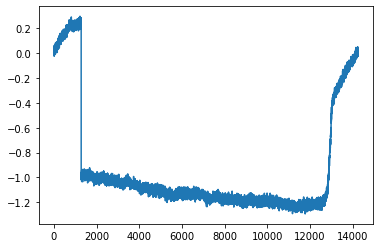

In [88]:
slice_x1 = 130
slice_x2 = 318
slice_y1 = 237
slice_y2 = 472

result=[]
for im in list(image.keys()):
    img_box = image[im][:,:,0][slice_y1:slice_y2, slice_x1:slice_x2]
    ave = np.average(img_box)
    result = np.append(result, [ave])
result= result - result[0]
plt.plot(result)

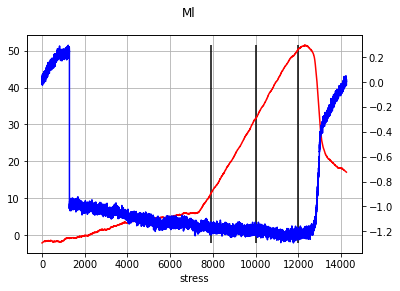

In [89]:
image_list = [7900, 10000,12000]
# min, max = ,
ml_avg = np.copy(result)
tension_data = np.array(pd.read_csv(path+'/tension.csv', encoding='CP949'))
time, strain, stress = tension_data[:, 0], tension_data[:, 3]*10/25, tension_data[:, 4]*3000/18
stress = savgol_filter(stress[0:],201,1)
strain = savgol_filter(strain[0:],201,1)
time = time[0:]

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.vlines(image_list, np.min(stress),np.max(stress),colors='black')
fig.suptitle('Ml')
ax.set_xlabel('stress')
ax1.plot(time, ml_avg, color='b', label="Average Ml(Same mask)")
ax.plot(time, stress, color='r', label=" stress")
ax.grid()
plt.show()
plt.close()